In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Notebook version only
import os
os.chdir(r'C:\Users\Administrator\Documents\GitHub')
# End Notebook version only

from DataHandlers.LinReg import PolyReg
from DataHandlers.ASTM_E698_2011 import PeakTempCorrection

In [2]:
# USER DEFINED PARAMETERS
raw = pd.read_csv(r'C:\Users\Administrator\Documents\GitHub\DataHandlers\notebooks\1-chloro-6-cyanohexane.urea-VR_JGW-A-37.csv')
mass = 9.620 #in mg
Therm_Resist = 0.49441 #in K/mW

In [3]:
df = PeakTempCorrection(raw, Therm_Resist, mass)
Rate_Corr = PolyReg(df['Heat Rate'], df['Lag Corr. ΔT'], 1)
# Rate_Corr.report()

coef_deg1       0.042463
std_err_deg1    0.001333
coef_deg0      -0.114879
std_err_deg0    0.133390
r_squared       0.989272
s_y             0.309733
dtype: float64

In [4]:
df['ln(Heat Rate/Tm2)'] = np.log(df['Heat Rate'] / df['Lag Corr. Temp (K)']**2)

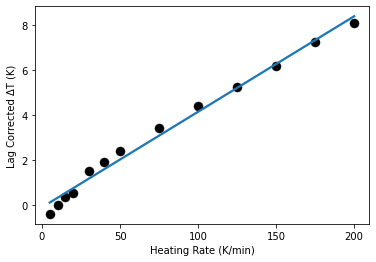

In [5]:
fig, ax1 = plt.subplots()
plt.style.use('seaborn-talk')
ax1.scatter(df['Heat Rate'], df['Lag Corr. ΔT'], c='black', zorder=0.1)
ax1.set_ylabel('Lag Corrected ΔT (K)')
ax1.set_xlabel('Heating Rate (K/min)')

# ax2 = ax1.twinx().twiny()
# How does one plot non-current ax on new fig???
ax2 = plt.plot(df['Heat Rate'], df['Heat Rate'] * Rate_Corr.coef[0] + Rate_Corr.coef[1])

# # Does the Lag Correction affect linearity?
# x_unc, y_unc = df['Heat Rate'], df['Peak Temp (C)'] - df.loc[df['Heat Rate']==10, 'Peak Temp (C)'].array
# ax3 = ax1.twiny()
# ax3 = plt.scatter(x_unc, y_unc, c='red', zorder=1)


Text(0.5, 0, '1/T')

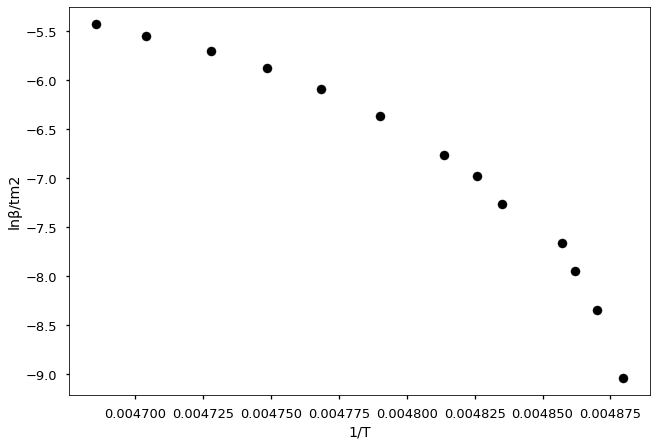

In [7]:
fig, ax1 = plt.subplots()
mpl.style.use('seaborn-talk')
ax1.scatter(1/df['Lag Corr. Temp (K)'], df['lnβ/tm2'], c='black', zorder=1)
ax1.set_ylabel('ln(Heat Rate/Tm2)')
ax1.set_xlabel('1/T')